In [2]:
#Data.csv

**Step 1: Importing the libraries**

In [3]:

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


**Step 2: Importing dataset**

In [4]:
df=pd.read_csv("/content/Data.csv")


In [5]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [6]:
df["Country"].value_counts()


France     4
Spain      3
Germany    3
Name: Country, dtype: int64

In [7]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


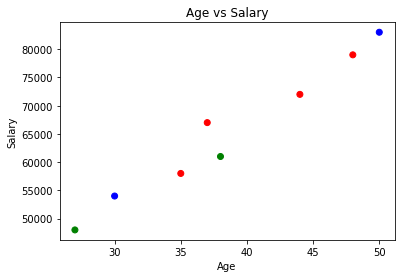

In [9]:
plt.title("Age vs Salary")
colors={"France":"red","Spain":"Green","Germany":"Blue"}
plt.scatter(df["Age"],df["Salary"],c=df["Country"].map(colors))
plt.xlabel("Age")
plt.ylabel("Salary")

plt.show()

**Step 3: Handling the missing data**

Replacing missing values with Mean of the respective columns.

In [10]:
print(df.isnull().sum())

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


In [11]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Salary"].fillna(df["Salary"].mean(),inplace=True)
print(df.isnull().sum())

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


**Step 4: Encoding categorical data**

In [12]:
#Encoding Purchased column with label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Purchased"] = le.fit_transform(df["Purchased"]) 

In [13]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,0
1,Spain,27.0,48000.000000,1
2,Germany,30.0,54000.000000,0
3,Spain,38.0,61000.000000,0
4,Germany,40.0,63777.777778,1


**Step 5: Creating a dummy variable**

In [14]:
#encoding Country column with dummies
dummies=pd.get_dummies(df["Country"])

In [15]:
df_final=pd.concat([dummies,df],axis=1)


In [16]:
df_final.drop("Country",axis=1,inplace=True)
df_final

,France,Germany,Spain,Age,Salary,Purchased
0,1,0,0,44.000000,72000.000000,0
1,0,0,1,27.000000,48000.000000,1
2,0,1,0,30.000000,54000.000000,0
3,0,0,1,38.000000,61000.000000,0
4,0,1,0,40.000000,63777.777778,1
5,1,0,0,35.000000,58000.000000,1
6,0,0,1,38.777778,52000.000000,0
7,1,0,0,48.000000,79000.000000,1
8,0,1,0,50.000000,83000.000000,0
9,1,0,0,37.000000,67000.000000,1


**Step 6: Splitting the datasets into training sets and Test sets**

In [17]:
X=df_final.iloc[:,:-1].values
Y=df_final["Purchased"].values

In [18]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)
print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is ', Y_test.shape)

Shape of X_train is  (8, 5)
Shape of X_test is  (2, 5)
Shape of Y_train is  (8,)
Shape of Y_test is  (2,)


**Step 7: Feature Scaling**

In [19]:
#Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [20]:
X_train

array([[ 1.        ,  0.        ,  0.        ,  1.51690792,  1.6629165 ],
       [ 0.        ,  1.        ,  0.        ,  0.73678385,  0.57151232],
       [ 0.        ,  0.        ,  1.        ,  0.4984126 , -0.99185042],
       [ 1.        ,  0.        ,  0.        ,  0.15169079,  0.99922477],
       [ 0.        ,  0.        ,  1.        ,  0.34672181,  0.20279469],
       [ 0.        ,  0.        ,  1.        , -1.79861939, -1.5228038 ],
       [ 0.        ,  1.        ,  0.        , -1.21352633, -0.72637373],
       [ 1.        ,  0.        ,  0.        , -0.23837124, -0.19542034]])

In [21]:
X_test

array([[0.        , 1.        , 0.        , 2.68709402, 3.1230383 ],
       [1.        , 0.        , 0.        , 2.29703199, 2.59208492]])